In [7]:
import pandas as pd
path = r"C:\Users\Tcs\Downloads\airline-passengers.csv"
df = pd.read_csv(path, parse_dates=['Month'], index_col = 'Month')
print(df.head())
print("\nIndex type:", type(df.index))

            Passengers
Month                 
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121

Index type: <class 'pandas.core.indexes.datetimes.DatetimeIndex'>


Dataset Info
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB
None
Summary Statistics
       Passengers
count  144.000000
mean   280.298611
std    119.966317
min    104.000000
25%    180.000000
50%    265.500000
75%    360.500000
max    622.000000
First Five rows:

            Passengers
Month                 
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121
Last Five rows:

            Passengers
Month                 
1960-08-01         606
1960-09-01         508
1960-10-01         461
1960-11-01         390
1960-12-01         432
Missing Value 

Passengers    0
dtype: int64


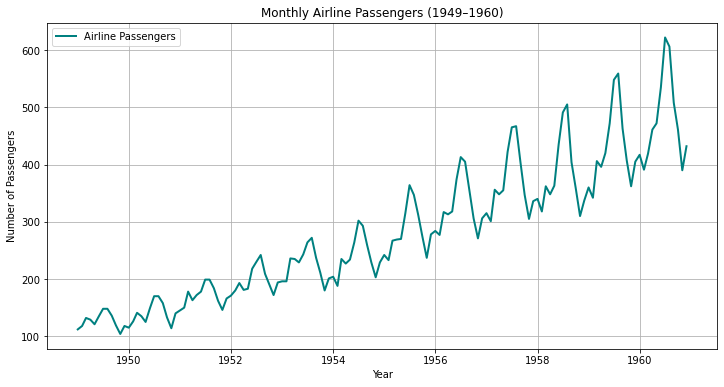

In [11]:
#Exploration of data
print("Dataset Info")
print(df.info())
print("Summary Statistics")
print(df.describe())
print("First Five rows:\n")
print(df.head())
print("Last Five rows:\n")
print(df.tail())
print("Missing Value \n")
print(df.isnull().sum())

import matplotlib.pyplot as plt


plt.figure(figsize=(12,6))
plt.plot(df, label="Airline Passengers", color="teal", linewidth=2)
plt.title("Monthly Airline Passengers (1949–1960)")
plt.xlabel("Year")
plt.ylabel("Number of Passengers")
plt.legend()
plt.grid(True)
plt.show()

In [12]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df['Passengers'])
print("ADF Statistic:", result[0])
print("p-value:", result[1])
print("Number of Lags Used:", result[2])
print("Number of Observations:", result[3])
print("Critical Values:")
for key, value in result[4].items():
    print(f"   {key}: {value:.3f}")
    



ADF Statistic: 0.8153688792060543
p-value: 0.9918802434376411
Number of Lags Used: 13
Number of Observations: 130
Critical Values:
   1%: -3.482
   5%: -2.884
   10%: -2.579


ADF Statistic:(Diff1) -2.8292668241700034
p-value: 0.054213290283824954
ADF Statistic:(diff12) -3.3830207264924805
p-value: 0.011551493085514982
ADF Statistic:(combined difference) -15.59561808374634
p-value: 1.856511600123444e-28


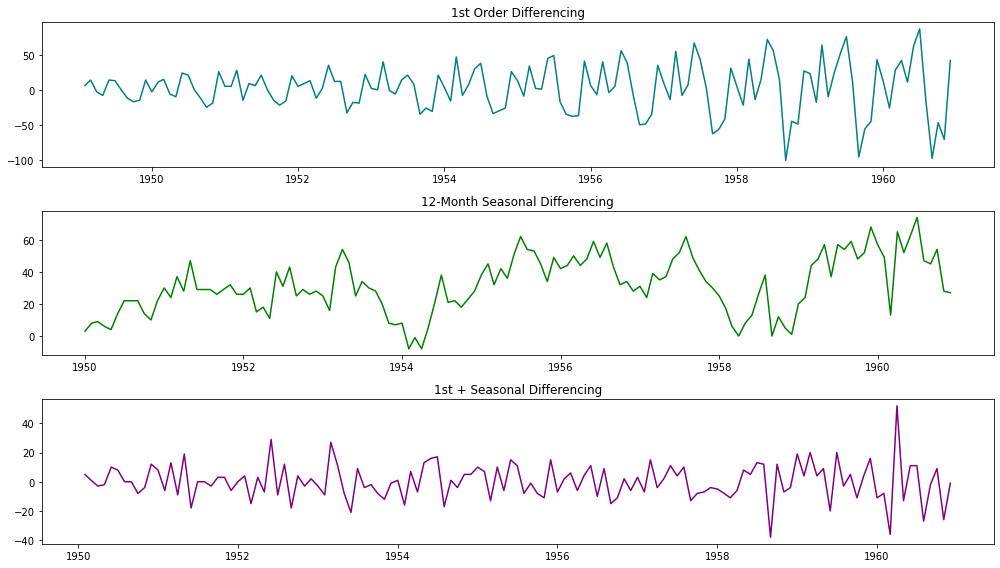

In [21]:
df_diff1 = df['Passengers'].diff().dropna()
result1 = adfuller(df_diff1)
print("ADF Statistic:(Diff1)", result1[0])
print("p-value:", result1[1])

df_diff12 = df['Passengers'].diff(12).dropna()
result2 = adfuller(df_diff12)
print("ADF Statistic:(diff12)", result2[0])
print("p-value:", result2[1])

df_diff_combined = df['Passengers'].diff().diff(12).dropna()
result3 = adfuller(df_diff_combined)
print("ADF Statistic:(combined difference)", result3[0])
print("p-value:", result3[1])

plt.figure(figsize=(14,8))

plt.subplot(3,1,1)
plt.plot(df_diff1, color="teal")
plt.title("1st Order Differencing")

plt.subplot(3,1,2)
plt.plot(df_diff12, color="green")
plt.title("12-Month Seasonal Differencing")

plt.subplot(3,1,3)
plt.plot(df_diff_combined, color="purple")
plt.title("1st + Seasonal Differencing")

plt.tight_layout()
plt.show()

ADF Statistic: -15.59561808374634
p-value: 1.856511600123444e-28
Number of Lags Used: 0
Number of Observations: 130
Critical Values:
   1%: -3.482
   5%: -2.884
   10%: -2.579


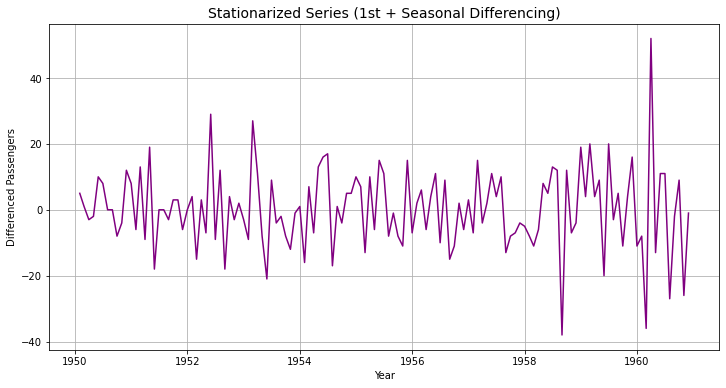


First 5 rows of Differenced Series:
Month
1950-02-01     5.0
1950-03-01     1.0
1950-04-01    -3.0
1950-05-01    -2.0
1950-06-01    10.0
Name: Passengers, dtype: float64


In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller


path = r"C:\Users\Tcs\Downloads\airline-passengers.csv"
df = pd.read_csv(path, parse_dates=['Month'], index_col='Month')


df_diff = df['Passengers'].diff().diff(12).dropna()


result = adfuller(df_diff)

print("ADF Statistic:", result[0])
print("p-value:", result[1])
print("Number of Lags Used:", result[2])
print("Number of Observations:", result[3])
print("Critical Values:")
for key, value in result[4].items():
    print(f"   {key}: {value:.3f}")


plt.figure(figsize=(12,6))
plt.plot(df_diff, color="purple", linewidth=1.5)
plt.title("Stationarized Series (1st + Seasonal Differencing)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Differenced Passengers")
plt.grid(True)
plt.show()

print("\nFirst 5 rows of Differenced Series:")
print(df_diff.head())


ADF Statistic(diff2): -2.9616951355554337
p-value: 0.03862975767698741

ADF Statistic(log+ 1st diff): -2.7171305983881595
p-value: 0.07112054815085424

ADF Statistic(log+ 12 month diff): -2.7095768189885714
p-value: 0.07239567181769445


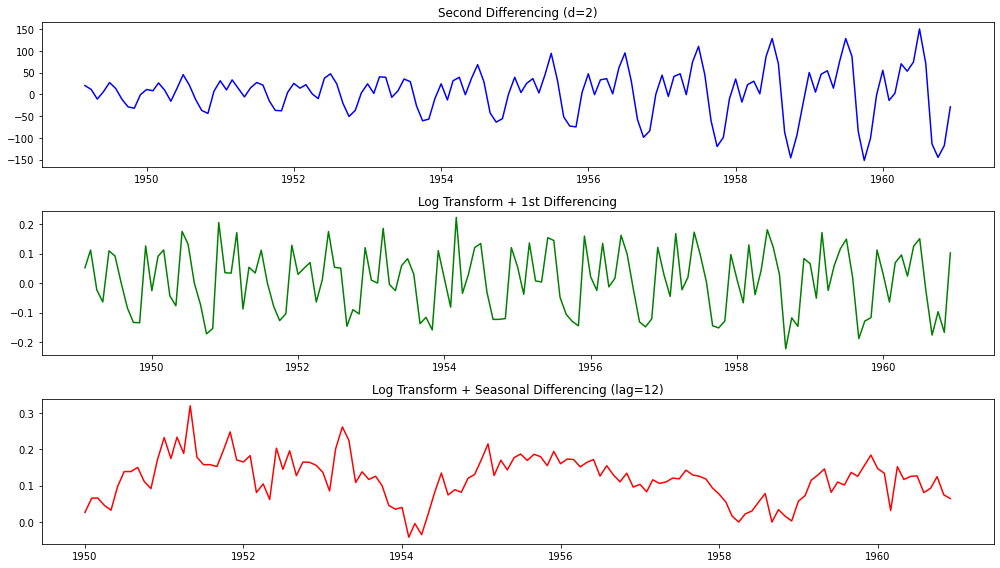

In [29]:
df_diff2 = df['Passengers'].diff(2).dropna()
result4 = adfuller(df_diff2)
print("ADF Statistic(diff2):",result4[0])
print("p-value:", result4[1])

import numpy as np
df_log = np.log(df['Passengers'])
df_log_diff = df_log.diff().dropna()
result_log = adfuller(df_log_diff)
print("\nADF Statistic(log+ 1st diff):",result_log[0])
print("p-value:", result_log[1])

df_log_diff12 = df_log.diff(12).dropna()
result_log_12 = adfuller(df_log_diff12)
print("\nADF Statistic(log+ 12 month diff):",result_log_12[0])
print("p-value:", result_log_12[1])

plt.figure(figsize=(14,8))

plt.subplot(3,1,1)
plt.plot(df_diff2, color="blue")
plt.title("Second Differencing (d=2)")

plt.subplot(3,1,2)
plt.plot(df_log_diff, color="green")
plt.title("Log Transform + 1st Differencing")

plt.subplot(3,1,3)
plt.plot(df_log_diff12, color="red")
plt.title("Log Transform + Seasonal Differencing (lag=12)")

plt.tight_layout()
plt.show()


In [30]:
train_size = int(len(df)*0.8)
train,test = df.iloc[:train_size], df.iloc[train_size:]

print("Training set shape:", train.shape)
print("Testing set shape:", test.shape)

print("\nTraining set range:", train.index.min(), "to", train.index.max())
print("Testing set range:", test.index.min(), "to", test.index.max())


Training set shape: (115, 1)
Testing set shape: (29, 1)

Training set range: 1949-01-01 00:00:00 to 1958-07-01 00:00:00
Testing set range: 1958-08-01 00:00:00 to 1960-12-01 00:00:00


In [34]:
from statsmodels.tsa.arima.model import ARIMA

d_value = 1  

model = ARIMA(train['Passengers'], order=(2, d_value, 2))
model_fit = model.fit()

print(model_fit.summary())

forecast = model_fit.forecast(steps=len(test))



                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  115
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -523.758
Date:                Tue, 16 Sep 2025   AIC                           1057.516
Time:                        16:15:14   BIC                           1071.197
Sample:                    01-01-1949   HQIC                          1063.069
                         - 07-01-1958                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3280      0.145      2.268      0.023       0.045       0.611
ar.L2          0.2521      0.165      1.528      0.126      -0.071       0.575
ma.L1         -0.0125      0.109     -0.114      0.9

C:\Users\Tcs\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Tcs\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Tcs\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


            Actual    Forecast
1958-08-01     505  487.825559
1958-09-01     404  460.796800
1958-10-01     359  451.130922
1958-11-01     310  441.145635
1958-12-01     337  435.433346


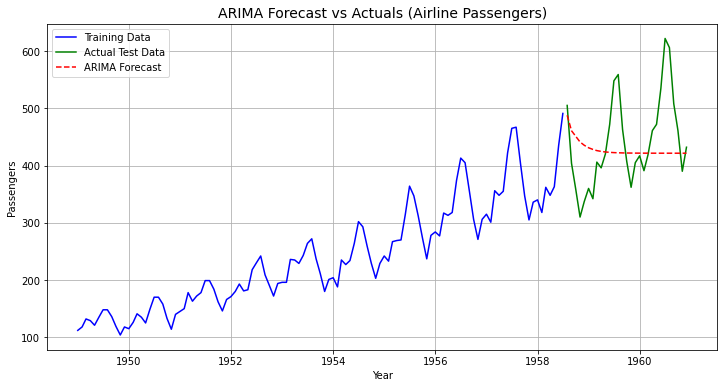

In [33]:
forecast_df = pd.DataFrame({
    "Actual": test['Passengers'],
    "Forecast": forecast
})

print(forecast_df.head())   

plt.figure(figsize=(12,6))
plt.plot(train.index, train['Passengers'], label="Training Data", color="blue")
plt.plot(test.index, test['Passengers'], label="Actual Test Data", color="green")
plt.plot(test.index, forecast, label="ARIMA Forecast", color="red", linestyle="--")
plt.title("ARIMA Forecast vs Actuals (Airline Passengers)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Passengers")
plt.legend()
plt.grid(True)
plt.show()


In [36]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(test['Passengers'], forecast)
mae = mean_absolute_error(test['Passengers'], forecast)
rmse = np.sqrt(mse)

print("Model Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


Model Evaluation Metrics:
Mean Squared Error (MSE): 6808.40
Mean Absolute Error (MAE): 63.55
Root Mean Squared Error (RMSE): 82.51


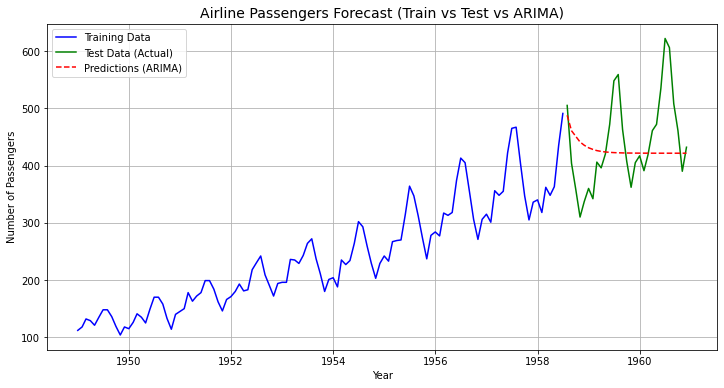

In [37]:
plt.figure(figsize=(12,6))
plt.plot(train.index, train['Passengers'], label="Training Data", color="blue")
plt.plot(test.index, test['Passengers'], label="Test Data (Actual)", color="green")
plt.plot(test.index, forecast, label="Predictions (ARIMA)", color="red", linestyle="--")
plt.title("Airline Passengers Forecast (Train vs Test vs ARIMA)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Number of Passengers")
plt.legend()
plt.grid(True)
plt.show()
